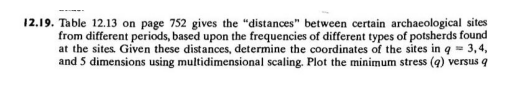

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

n=12
img = mpimg.imread(f'D:\MultivariateMethods\Homework2\{n}_19.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

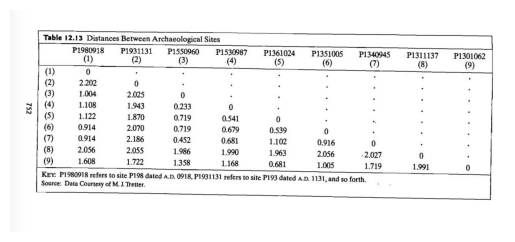

In [2]:
img = mpimg.imread('D:\MultivariateMethods\Homework2\Table_12_13.jpg')

plt.imshow(img)
plt.axis('off')  # Opcional: para quitar los ejes
plt.show()

Para resolver el ejercicio 12.19, necesitamos realizar un análisis de escalamiento multidimensional (MDS) utilizando las distancias proporcionadas en la tabla 12.13. El objetivo es determinar las coordenadas de los sitios arqueológicos en 3, 4 y 5 dimensiones, y graficar el "stress" mínimo en función de la dimensión 𝑞.

## Paso 1: Importación de bibliotecas y carga de datos

In [3]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Definimos las distancias de la tabla como una matriz (rellenamos con ceros en la diagonal)
distances = np.array([
    [0, 2.202, 1.004, 1.108, 1.122, 0.914, 0.914, 2.056, 1.608],
    [2.202, 0, 2.025, 1.943, 1.870, 2.070, 2.186, 2.055, 1.722],
    [1.004, 2.025, 0, 0.233, 0.719, 0.719, 0.452, 1.986, 1.358],
    [1.108, 1.943, 0.233, 0, 0.541, 0.679, 0.681, 1.990, 1.168],
    [1.122, 1.870, 0.719, 0.541, 0, 0.539, 1.102, 1.963, 0.681],
    [0.914, 2.070, 0.719, 0.679, 0.539, 0, 0.916, 2.056, 1.005],
    [0.914, 2.186, 0.452, 0.681, 1.102, 0.916, 0, 2.027, 1.719],
    [2.056, 2.055, 1.986, 1.990, 1.963, 2.056, 2.027, 0, 1.991],
    [1.608, 1.722, 1.358, 1.168, 0.681, 1.005, 1.719, 1.991, 0]
])

# Nombres de los sitios arqueológicos para referencia
sites = ["P1980918", "P1931131", "P1550960", "P1530987", "P1361024", 
         "P1351005", "P1340945", "P1311137", "P1301062"]

# Creamos un DataFrame opcional para visualizar las distancias
dist_df = pd.DataFrame(distances, index=sites, columns=sites)
dist_df

,P1980918,P1931131,P1550960,P1530987,P1361024,P1351005,P1340945,P1311137,P1301062
P1980918,0.000,2.202,1.004,1.108,1.122,0.914,0.914,2.056,1.608
P1931131,2.202,0.000,2.025,1.943,1.870,2.070,2.186,2.055,1.722
P1550960,1.004,2.025,0.000,0.233,0.719,0.719,0.452,1.986,1.358
P1530987,1.108,1.943,0.233,0.000,0.541,0.679,0.681,1.990,1.168
P1361024,1.122,1.870,0.719,0.541,0.000,0.539,1.102,1.963,0.681
P1351005,0.914,2.070,0.719,0.679,0.539,0.000,0.916,2.056,1.005
P1340945,0.914,2.186,0.452,0.681,1.102,0.916,0.000,2.027,1.719
P1311137,2.056,2.055,1.986,1.990,1.963,2.056,2.027,0.000,1.991
P1301062,1.608,1.722,1.358,1.168,0.681,1.005,1.719,1.991,0.000


## Paso 2: Aplicar MDS para dimensiones 3, 4 y 5
Aplicamos MDS en 3, 4 y 5 dimensiones y calculamos el "stress" asociado con cada configuración.

In [4]:
# Creamos una lista para almacenar el stress en cada dimensión
stress_values = []
dimensions = [3, 4, 5]

# Aplicamos MDS en diferentes dimensiones
for dim in dimensions:
    mds = MDS(n_components=dim, dissimilarity="precomputed", random_state=42)
    mds_fit = mds.fit_transform(distances)
    stress_values.append(mds.stress_)
    print(f"Coordenadas en {dim} dimensión(es):\n", mds_fit)
    print(f"Stress en {dim} dimensión(es): {mds.stress_}\n")


Coordenadas en 3 dimensión(es):
 [[-0.420102    0.6300719   0.62074521]
 [ 0.44183802 -1.07924224 -1.13119937]
 [ 0.19478859 -0.10461424  0.53495553]
 [ 0.34581703 -0.06171533  0.37318265]
 [ 0.41205985  0.2794668  -0.04246579]
 [ 0.12332114  0.50610457  0.17838585]
 [-0.102443   -0.16526753  0.82742488]
 [-1.37896581 -0.51091209 -0.65934954]
 [ 0.38368617  0.50610816 -0.70167942]]
Stress en 3 dimensión(es): 0.32356191492660324

Coordenadas en 4 dimensión(es):
 [[-0.34141494  0.54909717  0.67293093  0.12198711]
 [-0.01461504 -1.44523632 -0.11757186 -0.72201232]
 [ 0.27492534  0.44457911  0.00310724 -0.25106364]
 [ 0.36525187  0.25226248 -0.0088653  -0.1783327 ]
 [ 0.36060327  0.04512848 -0.07929176  0.34095022]
 [ 0.33982008  0.25692806  0.35908989  0.31813499]
 [ 0.03790176  0.76076552  0.00716922 -0.38620917]
 [-1.40046688 -0.32679361 -0.73237772  0.0721867 ]
 [ 0.37799453 -0.53673089 -0.10419064  0.68435881]]
Stress en 4 dimensión(es): 0.0886379030938248

Coordenadas en 5 dimensión(

C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manua

## Paso 3: Gráfica de Stress vs. Dimensión
Graficamos el "stress" en función de las dimensiones para visualizar cómo disminuye al incrementar el número de dimensiones.

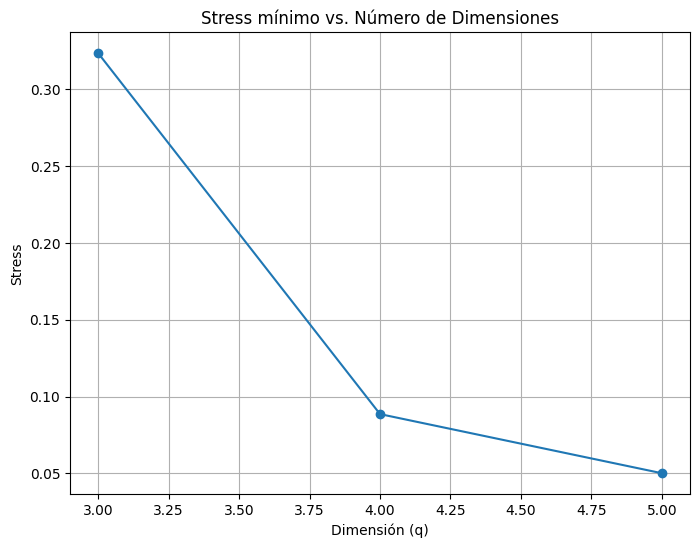

In [5]:
# Gráfica de Stress vs Dimensión
plt.figure(figsize=(8, 6))
plt.plot(dimensions, stress_values, marker='o')
plt.xlabel("Dimensión (q)")
plt.ylabel("Stress")
plt.title("Stress mínimo vs. Número de Dimensiones")
plt.grid(True)
plt.show()

### Interpretación de Resultados

1. **Stress mínimo vs Dimensión (q)**:
   - En 3 dimensiones, el "stress" obtenido es de aproximadamente **0.324**, lo que indica que la configuración en 3D captura parte de la estructura de las distancias, pero aún con una discrepancia significativa.
   - En 4 dimensiones, el "stress" disminuye considerablemente a **0.089**, lo que sugiere una mejora importante en la representación de las distancias entre los sitios arqueológicos.
   - En 5 dimensiones, el "stress" se reduce aún más a **0.050**, lo que indica que la representación en 5 dimensiones se ajusta mucho mejor a las distancias originales, con un nivel de "stress" bastante bajo.

2. **Gráfica del "stress" en función de la dimensión**:
   - La gráfica muestra una disminución rápida del "stress" al pasar de 3 a 4 dimensiones, y una disminución más moderada al aumentar a 5 dimensiones. Esto sugiere que gran parte de la estructura de las distancias puede capturarse en 4 dimensiones, y la mejora al utilizar 5 dimensiones es menos significativa.

3. **Conclusión sobre la elección de la dimensión**:
   - Si el objetivo es capturar la mayor precisión posible, la configuración en **5 dimensiones** es la mejor opción. No obstante, si buscamos un equilibrio entre simplicidad y precisión, la configuración en **4 dimensiones** sería la más adecuada, ya que logra un nivel de "stress" bajo (0.089) con una complejidad relativamente menor.
